# Clustering Activity

In [1]:
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score
import skfuzzy.cluster as fuzz
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Generate a hypothetical dataset
X, Y = make_blobs(n_samples=512, centers=4, random_state=32, cluster_std=1.5)

Exercise: Evaluate four clustering algorithms (K-Means, Fuzzy C-Means, Spectral, and Agglomerative)
1. Apply each clustering algorithm to the dataset where:
- cluster_count = 4
- random_state = 42 (where applicable)
- do not specify affinity, metric, algo, init, linkage (if applicable)
2. Use the **Adjusted Rand index** and **Silhouette Score** to evaluate the clustering performance.
3. Compare the performance of the algorithms based on the aforementioned metrics and decide which algorithm is best suited for the data given.

In [10]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

colors = ['red', 'orange', 'lime', 'green', 'blue', 'navy', 'violet']
samples = 128
cluster_count = 4     
random_state = 32

### Making the Data Plot

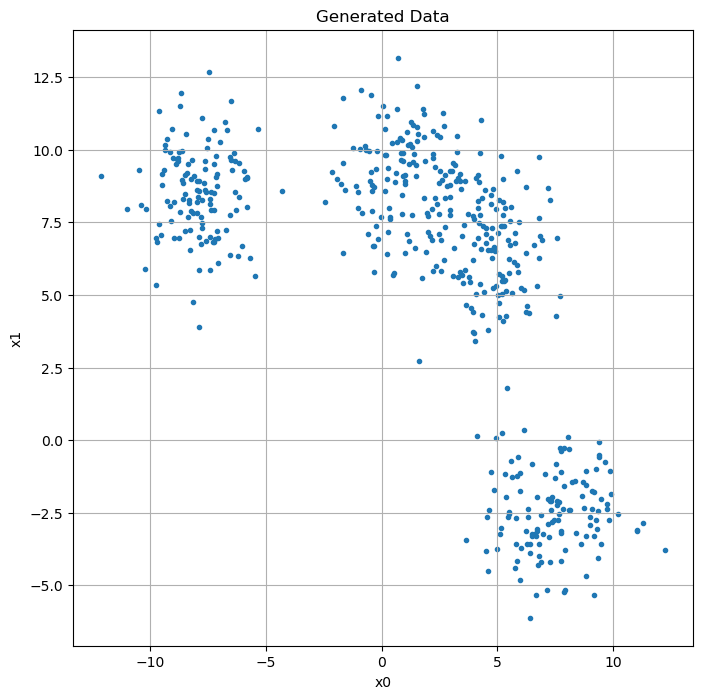

In [11]:
fig = plt.figure(figsize = (8,8))

plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Generated Data')
plt.grid()
plt.show()

### K-Means Clustering Code

In [12]:
from sklearn.cluster import KMeans

labels = KMeans(n_clusters=cluster_count, random_state=random_state).fit_predict(X)
kmeans_ari = adjusted_rand_score(Y, labels)
kmeans_sil = silhouette_score(X, labels)

print("Adjusted Rand Index:")
print(f"K-Means: {kmeans_ari}")

print("\n\nSilhouette Score:")
print(f"K-Means: {kmeans_sil}")

Adjusted Rand Index:
K-Means: 0.9164077695744833


Silhouette Score:
K-Means: 0.5925130925949564


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Fuzzy C-Means Clustering Code

In [13]:
from skfuzzy import cmeans, cmeans_predict

centers, labels, _, _, _, _, _  = cmeans(
    data=X.T,
    c = cluster_count,
    m = 1.25,
    error = 0.075,
    maxiter = 1000
)
target2 = np.argmax(labels, axis=0)
fcm_ari = adjusted_rand_score(Y, target2)
fcm_sil = silhouette_score(X, target2)

print("Adjusted Rand Index:")
print(f"Fuzzy C-Means: {fcm_ari}")

print("\n\nSilhouette Score:")
print(f"Fuzzy C-Means: {fcm_sil}")

Adjusted Rand Index:
Fuzzy C-Means: 0.9078689111522703


Silhouette Score:
Fuzzy C-Means: 0.5920044139376462


### Spectral Clustering Code

In [14]:
from sklearn.cluster import SpectralClustering

labels = SpectralClustering(n_clusters=cluster_count, random_state=42).fit_predict(X)
spectral_ari = adjusted_rand_score(Y, labels)
spectral_sil = silhouette_score(X, labels)

print("Adjusted Rand Index:")
print(f"Spectral Clustering: {spectral_ari}")

print("\n\nSilhouette Score:")
print(f"Spectral Clustering: {spectral_sil}")

Adjusted Rand Index:
Spectral Clustering: 0.9123306924834215


Silhouette Score:
Spectral Clustering: 0.5919081014227481


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Agglomerative Clustering Code

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

labels = AgglomerativeClustering(n_clusters=cluster_count).fit_predict(X)
agglomerative_ari = adjusted_rand_score(Y, labels)
agglomerative_sil = silhouette_score(X, labels)

print("Adjusted Rand Index:")
print(f"Agglomerative Clustering: {agglomerative_ari}")

print("\n\nSilhouette Score:")
print(f"Agglomerative Clustering: {agglomerative_sil}")

Adjusted Rand Index:
Agglomerative Clustering: 0.8822509845884963


Silhouette Score:
Agglomerative Clustering: 0.5853124848967419
